In [126]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# Question 3


## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [127]:
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(output_image)  ## your code here ##

(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

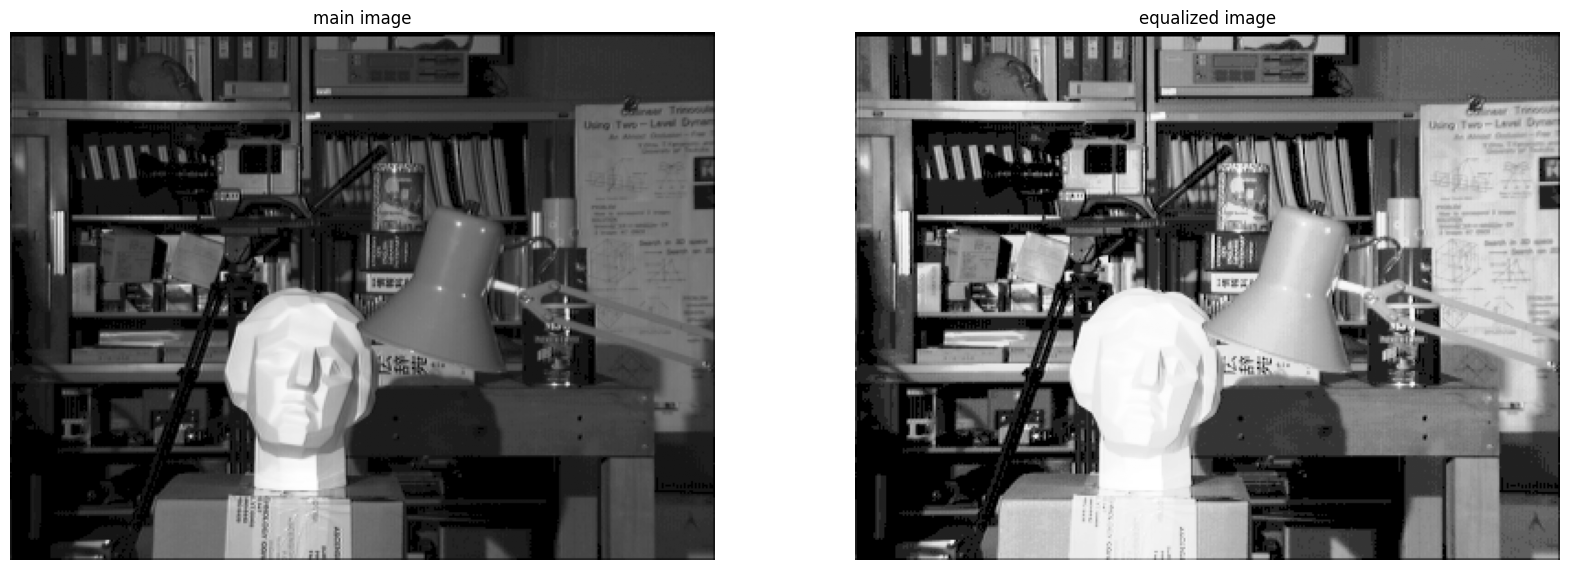

In [128]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b1


<h3> in this section we want to implement the first method for ACE </h3>
<h3> you are free to use opencv library </h3>


In [129]:
def ACE1(image, gridSize):
    '''
    you can use the equalize function of OpenCV for each grid
    Use first method for ACE implementation (calculating transition function for each grid)
    input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
    output(s):
    output (ndarray): improved image
    '''

    x, y = image.shape
    output_image = image.copy()

    # divide image to several sub-image and improve separately
    for i in range(0, x, gridSize):
        for j in range(0, y, gridSize):
            output_image[i:i + gridSize, j:j + gridSize] = cv2.equalizeHist(
                output_image[i:i + gridSize, j:j + gridSize])

    return output_image

(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

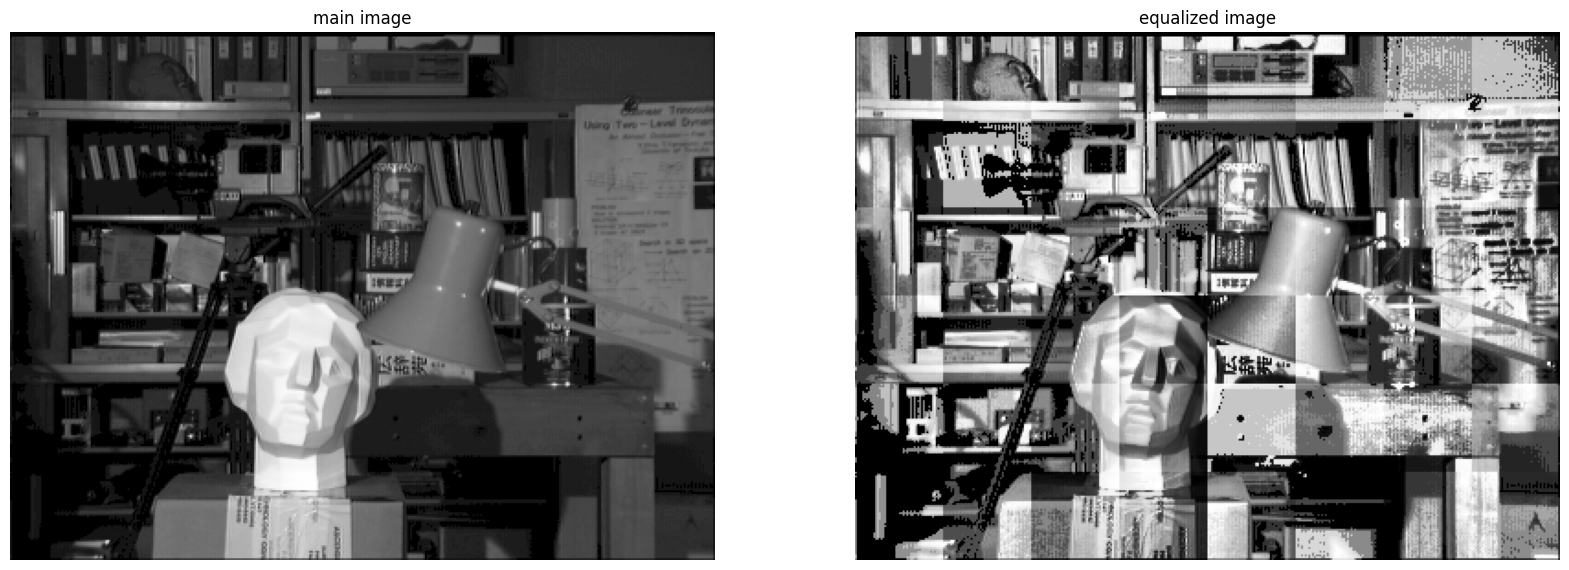

In [130]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
output_image = ACE1(image, 48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b2

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you are free to use opencv library </h3>

In [131]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    # get width and height of picture
    y, x = image.shape

    # for create grid for pixel in middle of that
    grid_y, grid_x = gridSize[0] // 2, gridSize[1] // 2
    
    # create padding for picture because of corner pixel 
    output_image = cv2.copyMakeBorder(output, gridSize[0], gridSize[0], gridSize[1], gridSize[1], cv2.BORDER_REFLECT)
    # loop for all pixel 
    for i in range(y):
        # create pixel of y-axis of grid
        i_new = i + gridSize[0]
        i_back = i_new - grid_y
        i_front = i_new + grid_y
        for j in range(x):
            # create pixel of x-axis of grid
            j_new = j + gridSize[1]
            j_back = j_new - grid_x
            j_front = j_new + grid_x

            # equalize for that grid we create 
            eq_img = cv2.equalizeHist(output_image[i_back:i_front, j_back:j_front])

            # set pixel of image to center of eq_img (this is that grid) 
            output[i, j] = eq_img[grid_y, grid_x]

    return output

(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

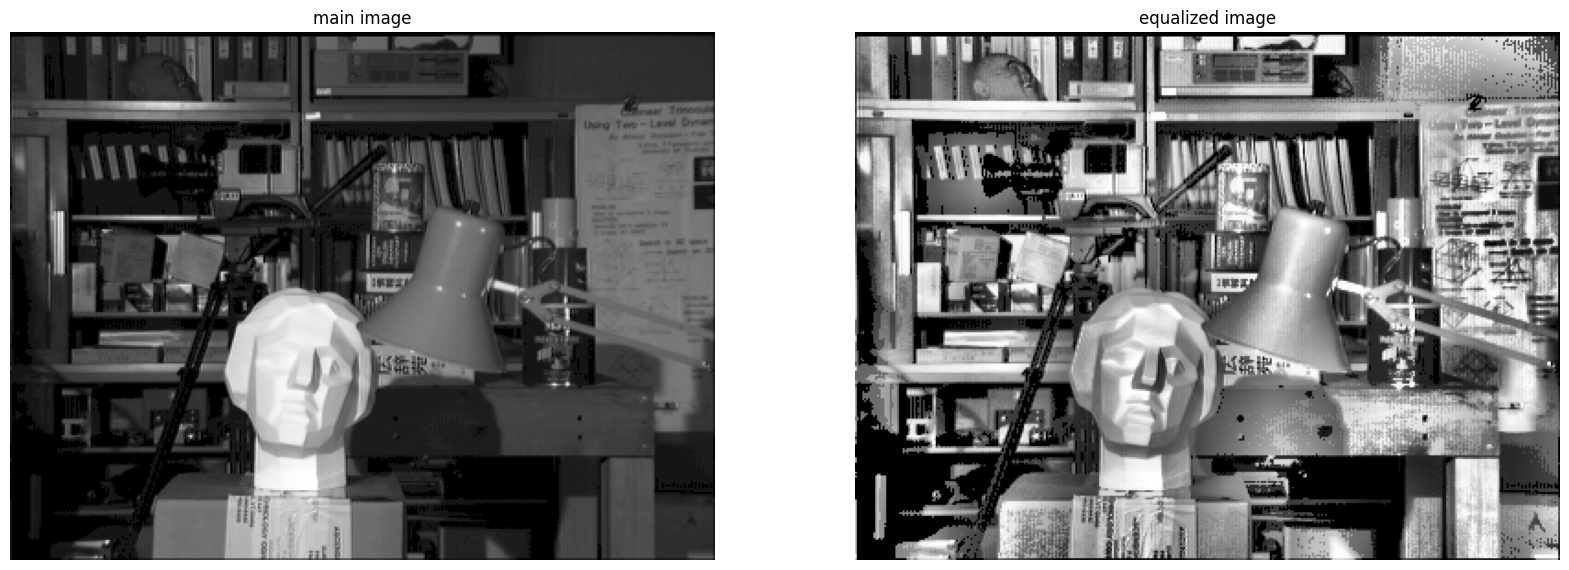

In [132]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
output_image = ACE2(image, (70, 70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b3

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [133]:
def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()

    y, x = image.shape

    # for create grid for pixel in middle of that
    grid_y = gridSize[0] // 2
    grid_x = gridSize[1] // 2

    # create padding for picture because of corner pixel 
    output_image = cv2.copyMakeBorder(output, gridSize[0], gridSize[0], gridSize[1], gridSize[1], cv2.BORDER_REFLECT)

    # loop for all pixel 
    for i in range(y):
        # create pixel of y-axis of grid
        i_new = i + gridSize[0]
        i_back = i_new - grid_y
        i_front = i_new + grid_y

        for j in range(x):
            # create pixel of x-axis of grid
            j_new = j + gridSize[1]
            j_back = j_new - grid_x
            j_front = j_new + grid_x

            # create grid_variable for grid image
            grid_image = output_image[i_back:i_front, j_back:j_front]
            # calc hist for grid image
            hist = cv2.calcHist([grid_image], [0], None, [256], [0, 256])

            # contrast limit and clip hist
            ex = np.maximum(hist - clip_limit, 0)
            total_of_add = np.sum(ex)
            hist = np.minimum(hist, clip_limit)
            hist += total_of_add // 256

            # probability and cdf of hist
            probability = hist / hist.sum()
            cdf = probability.cumsum()

            # new color == > cdf * 255 ;  0<= cdf <= 1 ===>   0<= cdf * 255 <= 255
            new_color = cdf * 255
            pixel = grid_image[grid_y, grid_x]
            output[i, j] = new_color[pixel]

    return output

(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

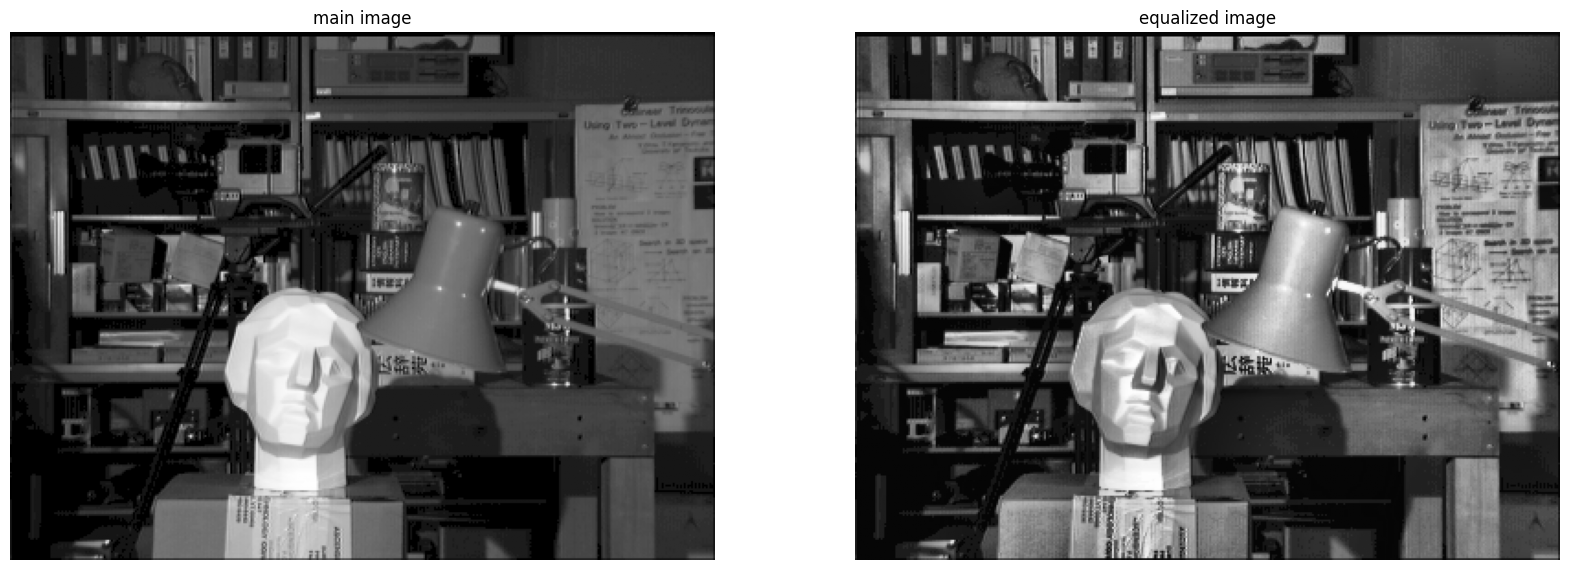

In [134]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
output_image = CLAHE(image, (70, 70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

# part c


<h3> in this section we want to implement CLAHE using opencv </h3>


In [135]:
def CLAHE(image, gridSize, clipLimit):
    '''
    use opencv library for CLAHE.
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''

    # clahe class in cv2
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=gridSize)
    clahe_output = clahe.apply(image)
    return clahe_output

<h3> run the following sections to answer part c </h3>


(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

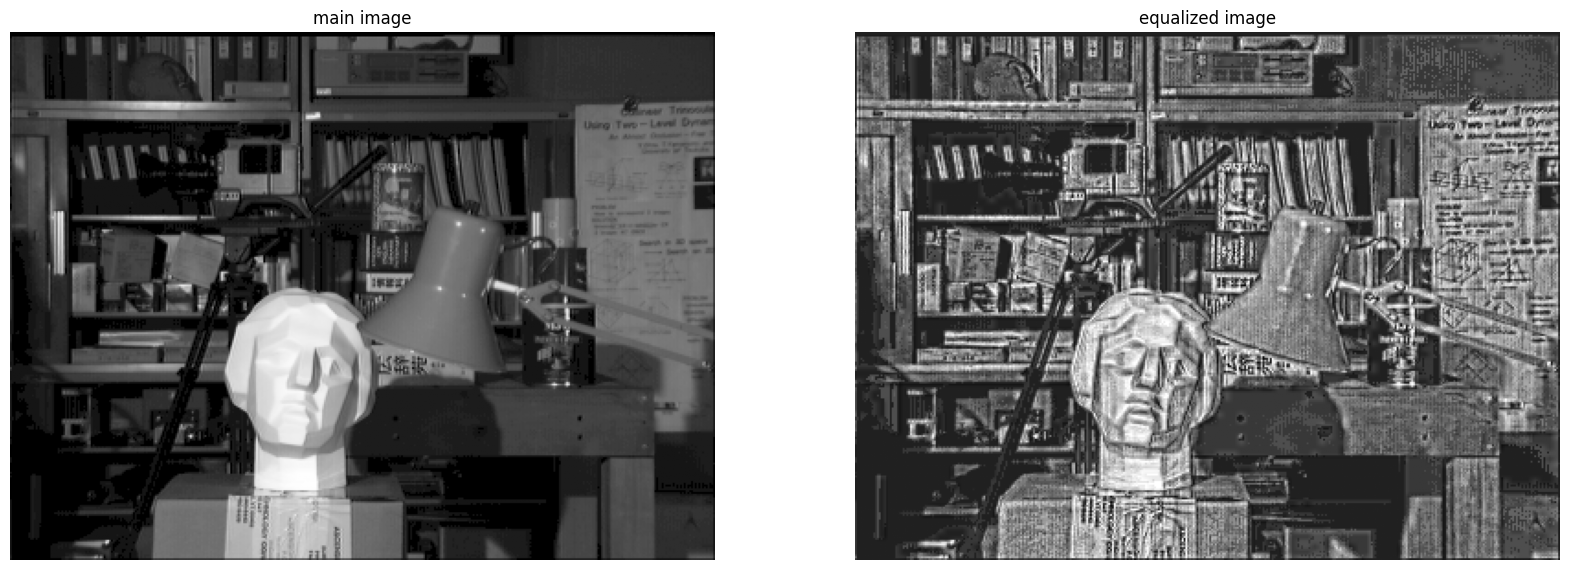

In [136]:
# dont change this cell
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
output_image1 = CLAHE(image, (128, 128), 2)
plt.imshow(output_image1, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

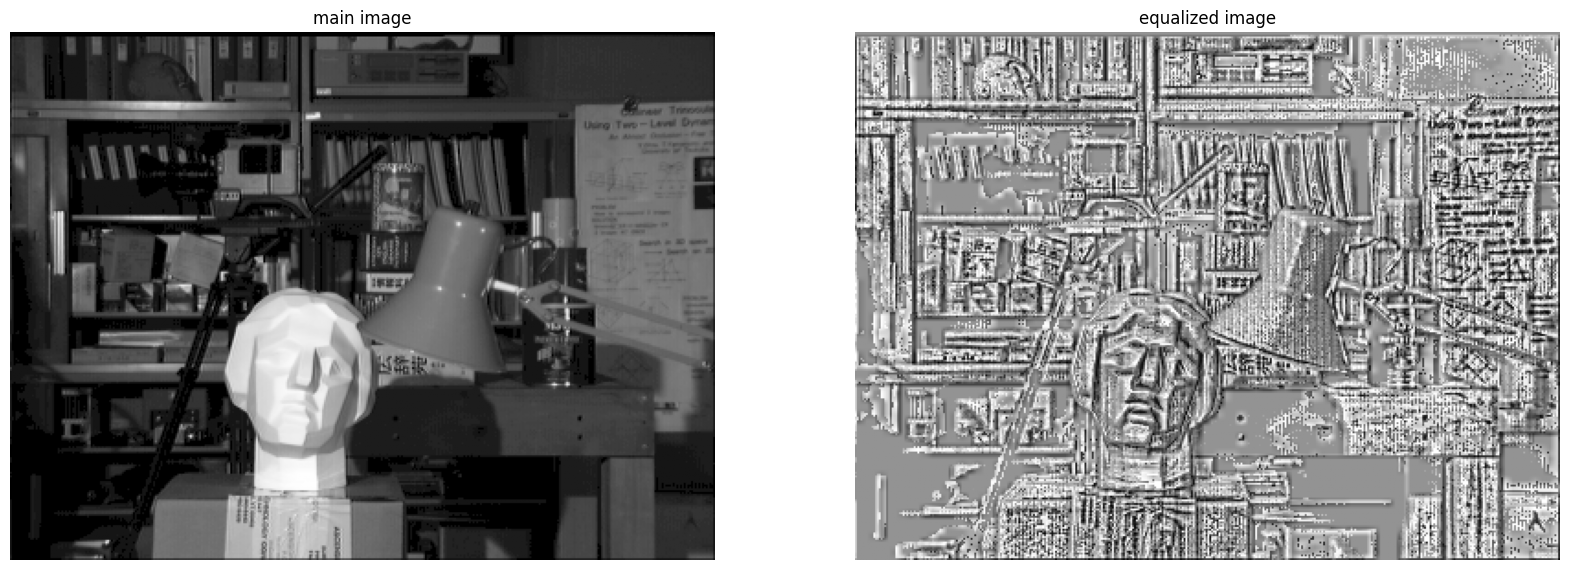

In [137]:
# dont change this cell
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
output_image2 = CLAHE(image, (128, 128), 128)
plt.imshow(output_image2, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

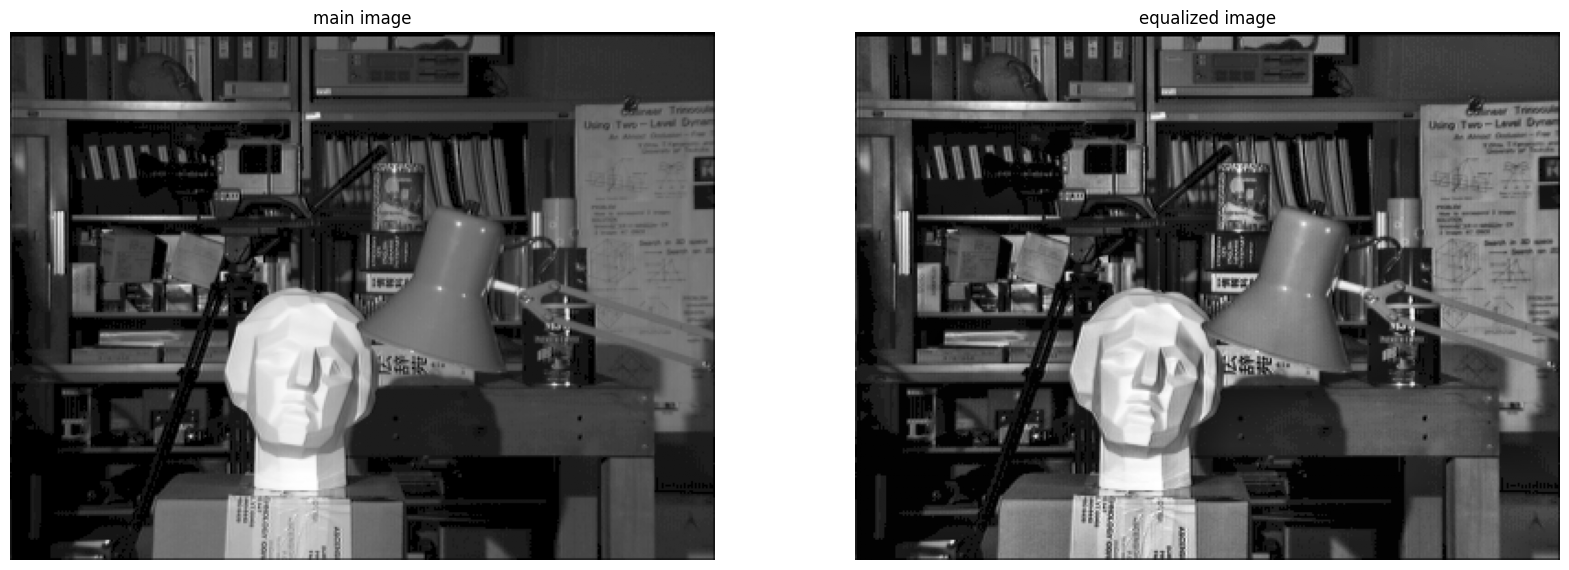

In [138]:
# dont change this cell
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
output_image3 = CLAHE(image, (16, 16), 2)
plt.imshow(output_image3, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

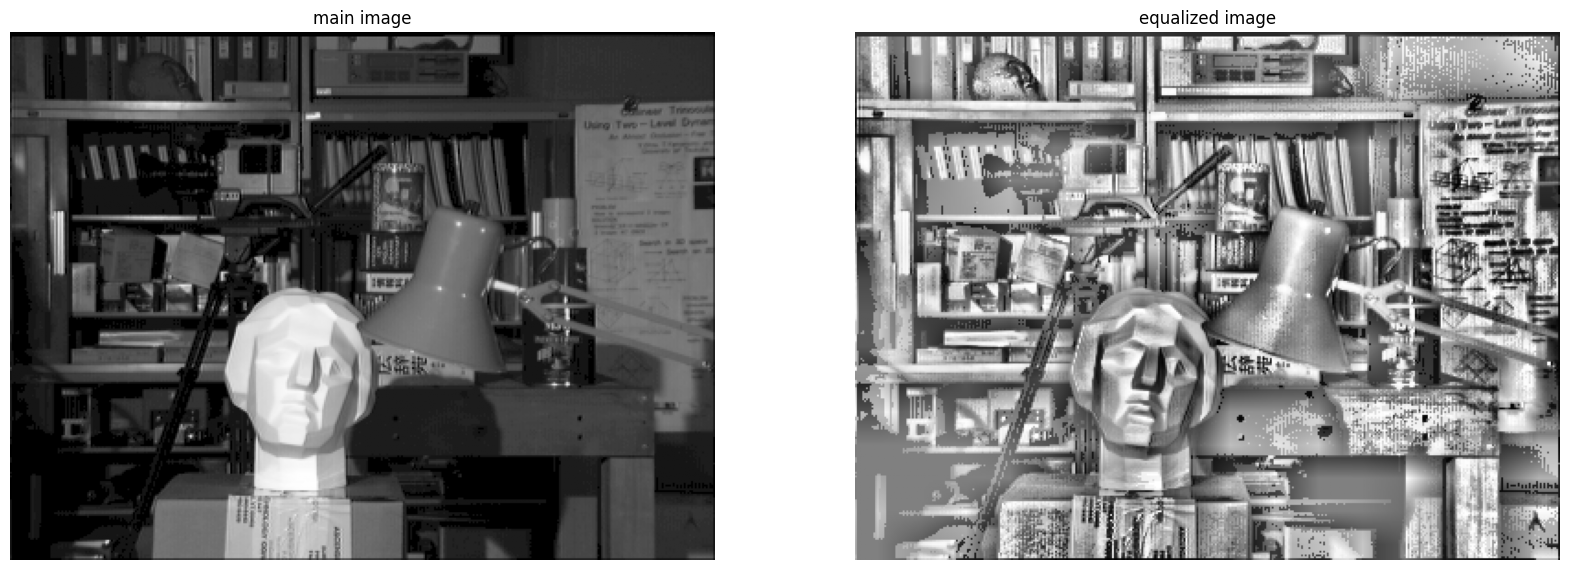

In [139]:
# dont change this cell
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
output_image4 = CLAHE(image, (16, 16), 128)
plt.imshow(output_image4, cmap='gray')
plt.title('equalized image')
plt.axis('off')